# Introducción<a id='int'></a>

La empresa Zuber es una nueva empresa de viajes compartidos que se está lanzando en Chicago. Vamos a encontrar patrones en la información disponible. 
Queremos comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.
Trabajaremos con una base de datos, analizaremos los datos de los competidores y probaremos una hipótesis sobre el impacto del clima en la frecuencia de los viajes.


# Contenido<a id='contenido'></a>
* [Introducción](#int)
* [Iniciación de datos](#ini)
* [Preparación de datos](#pre)
* [Análisis de datos](#ana)
* [Prueba de hipótesis](#hip)
* [Conclusión general](#con)

# Iniciación de datos<a id='ini'></a>

In [3]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2023-02-15T11:32:29.610514-05:00

Python implementation: CPython
Python version       : 3.9.15
IPython version      : 8.10.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [5]:
try:
    data1 = pd.read_csv('project_sql_result_01.csv')
    data2 = pd.read_csv('project_sql_result_04.csv')
    data3 = pd.read_csv('project_sql_result_07.csv')
except:
    data1 = pd.read_csv('/datasets/project_sql_result_01.csv')
    data2 = pd.read_csv('/datasets/project_sql_result_04.csv')
    data3 = pd.read_csv('/datasets/project_sql_result_07.csv')

Tenemos 3 datasets que son resultado de un análisis previo en SQL, los que se explican a continuación:

**data1 contiene:**

    - company_name: nombre de la empresa de taxis
    - trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.
    
**data2 contiene:**

    - dropoff_location_name: barrios de Chicago donde finalizaron los viajes
    - average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

**data3 contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.** 

    - start_ts: fecha y hora de la recogida
    - weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
    - duration_seconds: duración del viaje en segundos

In [6]:
data1

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
len(data1.company_name.unique())

64

In [9]:
data1.duplicated().sum()

0

In [10]:
data2

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [12]:
len(data2.dropoff_location_name.unique())

94

In [13]:
data2.duplicated().sum()

0

In [14]:
data3

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [15]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [16]:
data3.duplicated().sum()

197

Hemos importado los datos de nuestros 3 archivos csv y hemos revisado que en ningún archivo existen valores ausentes.

- En `data1` y `data2` los tipos de datos están correctos y no existen registros duplicados. Además observamos que los datos se encuentran ordenados de mayor a menor sus valores, por lo que no será necesario realizar posteriormente ordenamientos en caso que se requiera. Además no existen registros duplicados.

- En `data3` observamos que la columna `start_ts` que contiene fecha y hora se encuentra como object y se deberá cambiar el tipo de dato a fecha y hora. También se encuentran 197 registros duplicados.


# Preparación de datos<a id='pre'></a>

In [17]:
data3['start_ts'] = pd.to_datetime(data3['start_ts'], format="%Y-%m-%d %H:%M:%S")

In [18]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [19]:
data3[data3.duplicated()]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


Hemos cambiado el tipo de datos de start_st a datetime. Respecto a los 197 registros duplicados podría ser normal que existan viajes similares al mismo tiempo, pero es mucha coincidencia que la duración (en segundos) del viaje sea exacta también. Por lo que se decide eliminar y tratar esos como registros duplicados.

In [20]:
data3.drop_duplicates(inplace=True)

In [21]:
data3.duplicated().sum()

0

In [22]:
len(data3)

871

Hemos eliminado los registros duplicados. El data3 ahora contiene 871 archivos.

# Análisis de datos<a id='ana'></a>

Veamos los 10 principales barrios en tiempo promedio de finalización.

In [23]:
data2.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


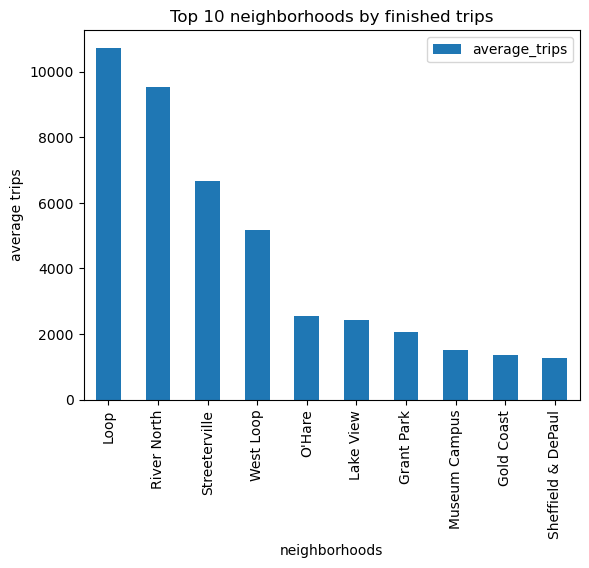

In [24]:
data2.head(10).plot(kind='bar', x='dropoff_location_name', y='average_trips')
plt.title('Top 10 neighborhoods by finished trips')
plt.ylabel('average trips')
plt.xlabel('neighborhoods')
plt.show()

Podemos observar los 10 principales barrios de acuerdo a los mayores promedios de viajes que terminaron en cada barrio en noviembre de 2017. Estos barrios son Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul.

El barrio Loop es el barrio más concurrido con más de 10.000 viajes en promedio, seguido de River North con más de 9.000 viajes en promedio. El barrio Sheffield / DePaul fue transcurrido 1259 veces en promedio.

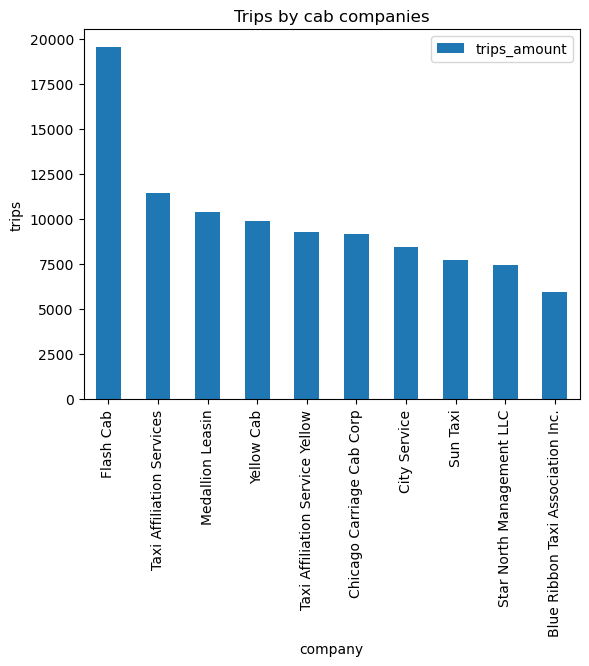

In [25]:
data1.head(10).plot(kind='bar', x='company_name', y='trips_amount')
plt.title('Trips by cab companies')
plt.ylabel('trips')
plt.xlabel('company')
plt.show()

Observamos también las empresas con más viajes realizados desde el 15 al 16 de noviembre del 2017. La compañia Flash Cab sin duda es la preferida por los clientes, puesto que realizó cerca de 20.000 viajes. Otras compañías también destacaron por debajo de los 12.000 viajes como Taxi Affiliation Services, Medallion Leasin entre otras.

# Prueba de hipótesis<a id='hip'></a>

Vamos a revisar si "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Antes que todo revisemos los datos.

In [26]:
data3.start_ts.dt.day_name().unique()

array(['Saturday'], dtype=object)

In [27]:
data3.weather_conditions.value_counts(normalize=True)

Good    0.83008
Bad     0.16992
Name: weather_conditions, dtype: float64

Todos los registros son de días sábados. Y el 83% se hicieron con condiciones buenas y el 17% con condiciones malas respecto al clima.

In [28]:
good_weather_trip = data3.query('weather_conditions == "Good"').duration_seconds
bad_weather_trip = data3.query('weather_conditions == "Bad"').duration_seconds

En la variable `good_weather_trip` tenemos todas las duraciones promedio de los viajes con condiciones buenas.
En la variable `bad_weather_trip` tenemos todas las duraciones promedio de los viajes con condiciones malas.

Revisemos como se ven los datos y su distribución en un boxplot antes de pasar a la prueba de hipótesis.

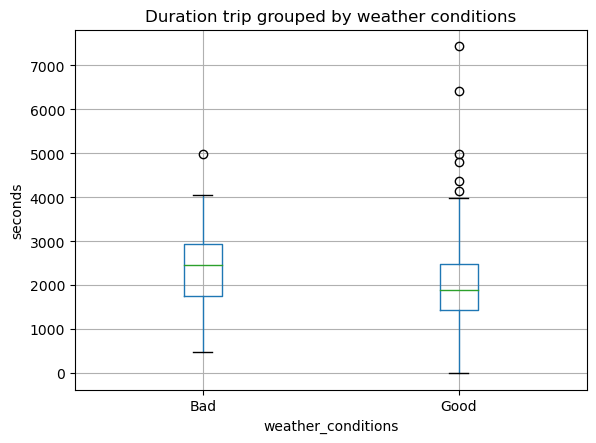

In [29]:
data3.boxplot(by='weather_conditions', column='duration_seconds')
plt.title('Duration trip grouped by weather conditions')
plt.suptitle('')
plt.ylabel('seconds')
plt.show()

Podemos ver que la duración promedio y mediana de los viajes en días lluviosos es más alta que en días soleados.

In [30]:
print(f'The average trip with good weather {good_weather_trip.mean():.2f} and bad weather {bad_weather_trip.mean():.2f}')

The average trip with good weather 2032.25 and bad weather 2409.23


**Formulación de hipótesis nula (H0) y alternativa (H1):**

    - H0: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia en los sábados lluviosos.
    - H1: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en los sábados lluviosos
 
De acuerdo al análisis que deseamos hacer acerca de los viajes en taxi de acuerdo al clima, consideramos establecer el nivel de significancia en 5%.

In [31]:
alpha = 0.05
results = st.ttest_ind(data3.query('weather_conditions == "Good"').duration_seconds, 
                        data3.query('weather_conditions == "Bad"').duration_seconds, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  9.126383933880083e-08
Rechazamos la hipótesis nula


Existe el 0.000009% de probabilidad de que ocurra que "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambie en los sábados lluviosos", esta probabilidad es casi nula, por lo que decidimos rotundamente rechazar nuestra hipótesis nula.

# Conclusión general<a id='con'></a>

El barrio Loop es el barrio más concurrido en noviembre del 2017. La compañia Flash Cab con más viajes realizados desde el 15 al 16 de noviembre del 2017. 
De acuerdo a nuestro test de hipótesis concluimos que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es diferente en los sábados lluviosos, es decir con malas condiciones climáticas.